# INTRODUCTION
## This data set is all about olymic games conducted from year 2000 to 2012 with all the details of player like his name, age, country wehe he belongs to the year of participation what kind of medals a player won and the total number of medals including gold,silver,bronze.

In [1]:
pip install pyspark

     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 198 kB 44.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=2a8764a8c17f4edb5ebe56d762bd13dfccea45c6c509a73bdf3b65fbd493019c
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('capstone').getOrCreate()

## Note: we are using file which data is alredy cleaned in pandas and loading that file into model.

## Q1. Write PySpark code to read olympix_data.csv file

In [6]:
df = spark.read.csv('/content/clean_olympic_data.csv', header=True, inferSchema=True)
# using spark to read a csv file and keeping its header as true and inferschema also to be true so data can take correct data type

In [7]:
df.toPandas()

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,2008-08-24,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,2004-08-29,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,2012-08-12,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,2008-08-24,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,2000-10-01,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8608,Olena Sadovnycha,32.0,Ukraine,2000,2000-10-01,Archery,0,1,0,1
8609,Kateryna Serdiuk,17.0,Ukraine,2000,2000-10-01,Archery,0,1,0,1
8610,Wietse van Alten,21.0,Netherlands,2000,2000-10-01,Archery,0,0,1,1
8611,Sandra WagnerSachse,31.0,Germany,2000,2000-10-01,Archery,0,0,1,1


## Q2. Write PySpark code to print the Olympic Sports/games in the dataset.

In [12]:
olympic_sports = df.select('sports').distinct() # selecting distict sports/games
olympic_sports.show(truncate=False, n =50) # showing all games

+-------------------------+
|sports                   |
+-------------------------+
|Gymnastics               |
|Tennis                   |
|Boxing                   |
|Short-Track Speed Skating|
|Ice Hockey               |
|Rowing                   |
|Judo                     |
|Softball                 |
|Sailing                  |
|Swimming                 |
|Alpine Skiing            |
|Basketball               |
|Handball                 |
|Rhythmic Gymnastics      |
|Biathlon                 |
|Triathlon                |
|Badminton                |
|Athletics                |
|Figure Skating           |
|Beach Volleyball         |
|Equestrian               |
|Shooting                 |
|Diving                   |
|Skeleton                 |
|Ski Jumping              |
|Nordic Combined          |
|Wrestling                |
|Speed Skating            |
|Table Tennis             |
|Taekwondo                |
|Canoeing                 |
|Weightlifting            |
|Waterpolo          

## Q3. Write PySpark code to plot the total number of medals in  each Olympic Sport/game

In [16]:
from pyspark.sql.functions import * #importing all sql funtions from pyspark.sql

In [17]:
distrinct_sports = df.groupBy('sports').agg(sum('total_medal')).sort('sum(total_medal)' ,ascending=False)
# grouping all sports with total medal as sum and sorting it into decending order

distrinct_sports = distrinct_sports.withColumnRenamed('sum(total_medal)','total_medal')
# renaming column 
distrinct_sports.show()

+----------+-----------+
|    sports|total_medal|
+----------+-----------+
|  Swimming|        765|
| Athletics|        753|
|    Rowing|        576|
|  Football|        407|
|    Hockey|        386|
|Ice Hockey|        384|
|  Handball|        351|
|  Canoeing|        333|
| Waterpolo|        306|
|   Cycling|        306|
|Basketball|        287|
|Gymnastics|        282|
|Volleyball|        278|
|   Fencing|        256|
| Wrestling|        245|
|      Judo|        224|
|  Baseball|        216|
|   Sailing|        210|
|  Shooting|        192|
|    Boxing|        188|
+----------+-----------+
only showing top 20 rows



In [26]:
type(distrinct_sports)
#checking the type of dataframe

pyspark.sql.dataframe.DataFrame

In [27]:
pandas_distrinct_sports_df = distrinct_sports.toPandas()
#converting spark dataframe to pandas dataframe
type(pandas_distrinct_sports_df)
#checking after convertion

pandas.core.frame.DataFrame

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
# importing required visual libraries

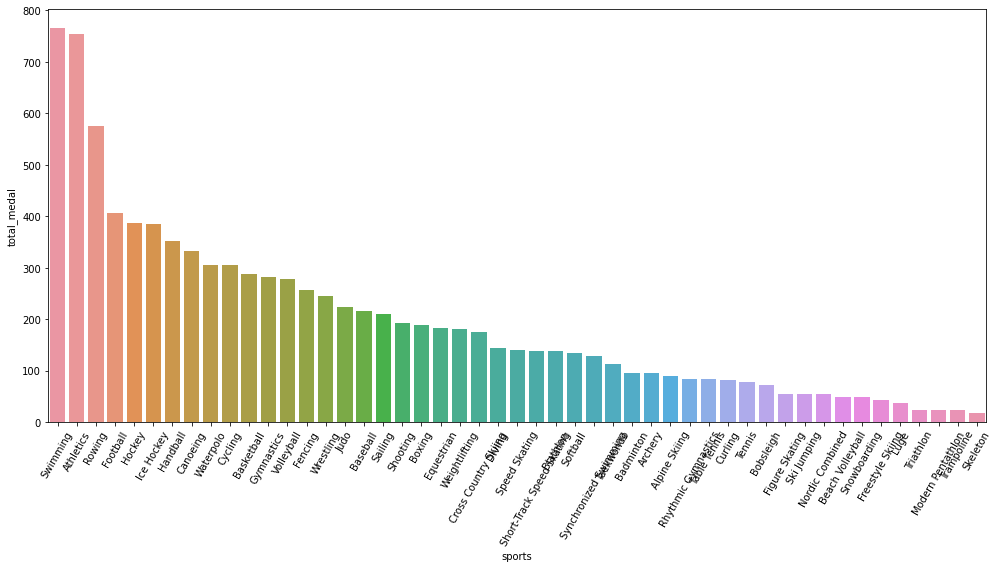

In [29]:
plt.figure(figsize=(14,8))
# resizing the plot output

plt.xticks(rotation=60)
# rotation ob tick lable so the dont overlap

sns.barplot(data=pandas_distrinct_sports_df, x ='sports', y='total_medal')
# using bar plot to see which sport got how many medals as x axis has sports names and y has number of medals

plt.tight_layout()
# using tight layout so it will fit automatically

## Q4. Sort the result based on the total number of medals.

In [18]:
total_medals_by_country = df.groupBy('country').agg(sum('total_medal')).sort('sum(total_medal)', ascending=False)
# grouping by country and total medal finally sorting it in decending format

total_medals_by_country = total_medals_by_country.withColumnRenamed('sum(total_medal)', 'total_medal_by_country')
# renaming column 
total_medals_by_country.toPandas()

,country,total_medal_by_country
0,United States,1312
1,Russia,768
2,Germany,629
3,Australia,609
4,China,530
...,...,...
105,Macedonia,1
106,Mozambique,1
107,Botswana,1
108,Bahrain,1


## Q5.Find the total number of medals won by each country in swimming.

In [19]:
total_medals_in_swimming = df.filter(df['sports'] == 'Swimming')
# filtering out first swimming as a sports

total_medals_in_swimming = total_medals_in_swimming.groupBy('country').agg(sum('total_medal')).sort('sum(total_medal)', ascending=False)
# grouping by total medals by country and sorting it in decending order

total_medals_in_swimming = total_medals_in_swimming.withColumnRenamed('sum(total_medal)', 'total_medal_in_swimming')
# renameing column

total_medals_in_swimming.toPandas()


,country,total_medal_in_swimming
0,United States,267
1,Australia,163
2,Netherlands,46
3,Japan,43
4,France,39
5,China,35
6,Germany,32
7,Russia,20
8,Italy,16
9,Great Britain,11


## Q6. Find the total number of medals won by each country in Skeleton.

In [20]:
total_medals_in_skeleton = df.filter(df['sports'] == 'Skeleton')
# filtering out first skeleton as a sports

total_medals_in_skeleton = total_medals_in_skeleton.groupBy('country').agg(sum('total_medal')).sort('sum(total_medal)', ascending=False)
# grouping by total medals by country and sorting it in decending order

total_medals_in_skeleton = total_medals_in_skeleton.withColumnRenamed('sum(total_medal)', 'total_medal_in_skeleton')
# renaming column 

total_medals_in_skeleton.show()

+-------------+-----------------------+
|      country|total_medal_in_skeleton|
+-------------+-----------------------+
|       Canada|                      4|
|Great Britain|                      3|
|  Switzerland|                      3|
|United States|                      3|
|      Germany|                      2|
|       Russia|                      1|
|      Austria|                      1|
|       Latvia|                      1|
+-------------+-----------------------+



## Q7. Find the number of medals that the US won yearly.

In [21]:
us_won = df.filter(df['country'] == 'United States')
# filtering out only us data

yearly_won = us_won.groupBy('year').agg(sum('total_medal')).sort('sum(total_medal)',ascending=False)
# grouping by yearly for total medals and sorting it out in decending order

yearly_won = yearly_won.withColumnRenamed('sum(total_medal)', 'total_medal_of_USA')
#renaming column name

yearly_won.toPandas()

,year,total_medal_of_USA
0,2008,317
1,2004,265
2,2012,254
3,2000,243
4,2010,97
5,2002,84
6,2006,52


## Q8 Find the total number of medals won by each country.

In [22]:
total_medals_by_country = df.groupBy('country').agg(sum('total_medal')).sort('sum(total_medal)', ascending=False)
# grouping total medal country wise and sorting the data in decending order

total_medals_by_country = total_medals_by_country.withColumnRenamed('sum(total_medal)', 'total_medal_by_country')
# renaming the column

total_medals_by_country.toPandas()

,country,total_medal_by_country
0,United States,1312
1,Russia,768
2,Germany,629
3,Australia,609
4,China,530
...,...,...
105,Macedonia,1
106,Mozambique,1
107,Botswana,1
108,Bahrain,1


## Q9. Who was the oldest athlete in the olympics? 

In [23]:
oldest_player = df.agg(max('age')).collect()
#collecting max age ferom age column

oldest_player_details = df.filter(df['age'] == oldest_player[0][0])
#filtering out that row with the mathcing the value via indexing to match value only

oldest_player_details.select(['name','age']).show()
#selecting the required data

+----------+----+
|      name| age|
+----------+----+
|Ian Millar|61.0|
+----------+----+



## Q10. Which country was he/she from?

In [24]:
oldest_player = df.agg(max('age')).collect()
#collecting max age ferom age column

oldest_player_details = df.filter(df['age'] == oldest_player[0][0])
#filtering out that row with the mathcing the value via indexing to match value only

oldest_player_details.show()
# showing all data

+----------+----+-------+----+----------+----------+----------+------------+-----------+-----------+
|      name| age|country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------+----+-------+----+----------+----------+----------+------------+-----------+-----------+
|Ian Millar|61.0| Canada|2008|2008-08-24|Equestrian|         0|           1|          0|          1|
+----------+----+-------+----+----------+----------+----------+------------+-----------+-----------+



In [25]:
oldest_player_details.select(['name','age','country']).show()
# showing only name , age and country

+----------+----+-------+
|      name| age|country|
+----------+----+-------+
|Ian Millar|61.0| Canada|
+----------+----+-------+

